Input data:
-	Take a Kepler time series from Jake Vanderplas
-	Artificial data by Cole

Exploratory:
-	Plot the data
-	Plot a Lomb-Scargle periodogram

Processing:
-	Compose a Gaussian Process from a reasonable guess of kernels
-	Learn the hyperparameters of each kernels by search
-	Substract the model from the data
-	Test that the remainder is white noise(?)
-	Predict gaps using the model?

Output:
-	Plot the data
-	Take X samples of final model and visualize
-	Show the model applied to the data with confidence intervals

In [13]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy

Generate some data

In [14]:
# lambda function, call f(x) to generate data
f = lambda x: -np.cos(2*np.pi*x) + 0.5*np.sin(6*np.pi*x)

n = 100
# 100 equally spaced sample locations 
X = np.linspace(0.05, 0.95, n)[:,None]

# y = f(X) + epsilon
Y = f(X) + np.random.normal(0., 0.1, (n,1)) # note that np.random.normal takes mean and s.d. (not variance), 0.1^2 = 0.01

In [15]:
# Y

array([[-5.26337763e-01],
       [-5.64922424e-01],
       [-4.99209027e-01],
       [-1.85601383e-01],
       [-4.65888653e-01],
       [-3.47169836e-01],
       [-4.18409869e-01],
       [-2.13172803e-01],
       [-4.26954256e-01],
       [-4.71642712e-01],
       [-2.38488465e-01],
       [-4.54202176e-01],
       [-4.88726016e-01],
       [-5.41610845e-01],
       [-5.30285375e-01],
       [-6.50255738e-01],
       [-4.47376721e-01],
       [-4.98550962e-01],
       [-2.80879693e-01],
       [-5.51025168e-01],
       [-6.16233332e-01],
       [-5.48171526e-01],
       [-5.53548882e-01],
       [-4.48990924e-01],
       [-3.85614608e-01],
       [-2.29353933e-01],
       [ 9.87628337e-03],
       [-2.09156749e-01],
       [ 2.98063985e-01],
       [ 3.32518181e-01],
       [ 4.30637267e-01],
       [ 4.08218498e-01],
       [ 6.64113505e-01],
       [ 6.14510751e-01],
       [ 6.68305660e-01],
       [ 8.27453321e-01],
       [ 9.74370554e-01],
       [ 1.11268143e+00],
       [ 1.1

# 1. Exploratory
Plot the data

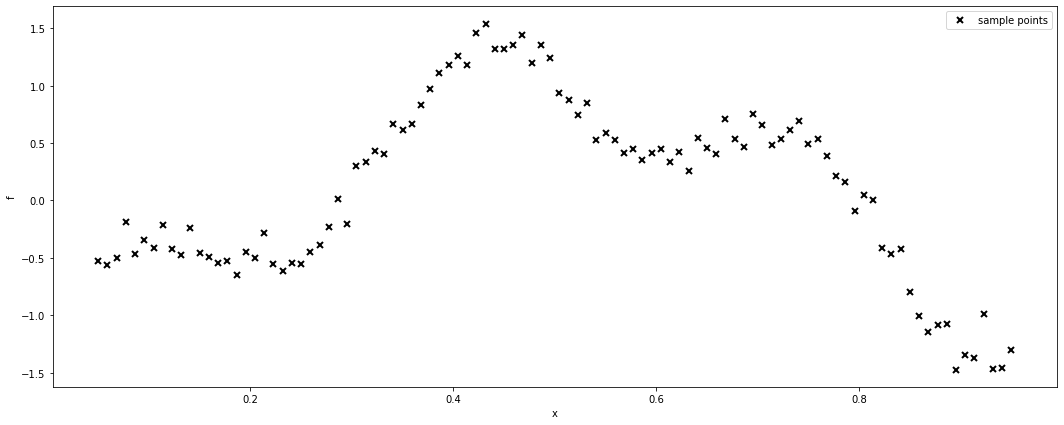

In [16]:
# Setup our figure environment
plt.figure(figsize=(18, 7))

# Plot observations
plt.plot(X, Y, "kx", mew=2)

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);

# 2. Processing


Compose a Gaussian Process from a reasonable guess of kernels

In [17]:
ks = [ # Our kernels
    GPy.kern.Bias(1, variance=10000.),    # Constant offset
    GPy.kern.Linear(1),                   # Linear trend
    GPy.kern.StdPeriodic(1, period=1)     # Periodicity
]

# Create a regression model with an additive kernel (bias + linear + periodic)
m = GPy.models.GPRegression(X, Y, ks[0] + ks[1] + ks[2])

In [ ]:
m.optimize()
m

In [ ]:
def plot_gp(X, m, C, training_points=None):
    """ Plotting utility to plot a GP fit with 95% confidence interval """
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0],
                     m[:,0] - 1.96*np.sqrt(np.diag(C)),
                     m[:,0] + 1.96*np.sqrt(np.diag(C)),
                     alpha=0.5)
    # Plot GP mean and initial training points
    plt.plot(X, m, "-")
    plt.legend(labels=["GP fit"])
    
    plt.xlabel("x"), plt.ylabel("f")
    
    # Plot training points if included
    if training_points is not None:
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.legend(labels=["GP fit", "sample points"])

In [ ]:
# Get mean and covariance of optimised GP
mean, Cov = m.predict(X, full_cov=True)

# Setup the figure environment
plt.figure(figsize=(14, 8))

# Plot the GP fit mean and covariance
plot_gp(X, mean, Cov, training_points=(X,Y))
plt.plot(X, f(X), "r:", lw=3)

In [ ]:
residuals = Y-mean

In [ ]:
# Plot GP mean and initial training points
plt.plot(X, residuals, "-")
plt.legend(labels=["Residuals"])

In [ ]:
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf

rcParams["figure.figsize"] = 9, 4
# ACF function up to 50 lags
fig = plot_acf(Y, lags=50)

plt.show();

In [ ]:
fig = plot_acf(noise, lags=40)

plt.title("Autocorrelation of a White Noise Series")
plt.show()